# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import missingno as msng

# Agenda—To distill and articulate data-derived insights in a manner that is easily comprehensible for Stakeholders without a technical background and help data science team to make models out of the data 

# Importing Dataset

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [3]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


# Basic Data Cleaning and Wrangling

## Dealing With Null Values
- Find out columns which contain Null Values
- Find out the percentage of Null Values
- Create a Reference Data Reference Dataset and match values from that dataset
- If there are Still Null Values, then it's better to delete them or impute them (depends on dataset)
### Insights on Null Values
- Only two columns Source_Name, Destination_Name have Null Values 
- Only 0.2 percent and 0.18 percent of data from Source_Name, Destination_Name have Null Values, It can still be mapped  

Deleting irrelevant columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

Getting Columns with Null Values

In [6]:
df.columns[df.isna().any()]

Index(['source_name', 'destination_name'], dtype='object')

Getting Percentage of Null Values

In [7]:
(df.isna().sum()/df.shape[0] *100).reset_index().rename({0: "miss_perc"},axis = 1)

,index,miss_perc
0,data,0.000000
1,trip_creation_time,0.000000
2,route_schedule_uuid,0.000000
3,route_type,0.000000
4,trip_uuid,0.000000
5,source_center,0.000000
6,source_name,0.202254
7,destination_center,0.000000
8,destination_name,0.180165
9,od_start_time,0.000000


Getting A visual representation of Columns with Null Values, and whether there is a Correlation b/w or not

<Axes: >

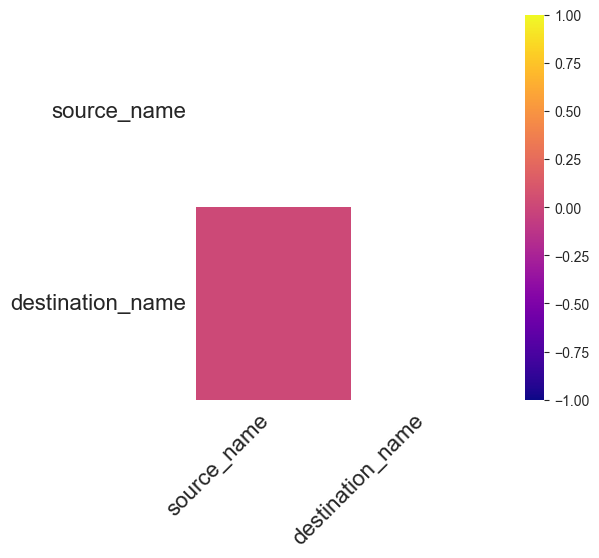

In [8]:
msng.heatmap(df,cmap='plasma',figsize=(5,5))

###  Handling Null Values
- Create a Reference list of Center Code and Center Name and Validated Result 
- Turns out There Few Center-ID With Null Values, Which resulted in the same result as Before

In [9]:
list_of_source_center = df.groupby(['source_center','source_name']).size().reset_index()
list_of_source_center = list_of_source_center.rename(columns={0: 'count','source_center':'center','source_name':'name'}).drop(columns=['count'])
list_of_source_center.sample(5)

,center,name
628,IND431001AAB,Aurangabad_Pratpngr_D (Maharashtra)
504,IND395004AAB,Surat_Central_D_3 (Gujarat)
92,IND140301AAA,Chandigarh_Kharar_DC (Chandigarh)
670,IND462011AAA,Bhopal MP Nagar (Madhya Pradesh)
89,IND136128AAA,Pehowa_WdN14DPP_D (Haryana)


In [10]:
list_of_destination_center = df.groupby(['destination_center','destination_name']).size().reset_index()
list_of_destination_center = list_of_destination_center.rename(columns={0: 'count','destination_center':'center','destination_name':'name'}).drop(columns=['count'])
list_of_destination_center.sample(5)

,center,name
1377,IND798601AAA,Mokokchung_Central_D_1 (Nagaland)
963,IND581325AAA,Dandeli_RKComplx_D (Karnataka)
1085,IND628801AAA,Eral_Busstand_D (Tamil Nadu)
1112,IND638701AAA,Kangayam_Thvlrsrt_D (Tamil Nadu)
852,IND531001AAA,Anakapalle_Kothuru_D (Andhra Pradesh)


In [11]:
center_lookup = pd.concat([list_of_source_center,list_of_destination_center],ignore_index=True)
center_lookup.drop_duplicates(inplace=True)
center_to_name = center_lookup.set_index('center')['name'].to_dict()

#### Method—1 Filling Values using Reference
- After Creating a Reference Table, we create a Dictionary 
- Later we apply the map function to the respective columns

In [12]:
center_to_name  # this is a dictionary of all the Center and Names
dict(zip(list(center_to_name.keys())[:5], list(center_to_name.values())[:5])) #Top 5 entries of this dictionary

{'IND000000AAL': 'Pune_PC (Maharashtra)',
 'IND000000AAQ': 'Barasat_KrshnNgr_D (West Bengal)',
 'IND000000AAS': 'Bongaigaon_Chpaguri_D (Assam)',
 'IND000000AAZ': 'Buldhana_Thsil3PL_D (Maharashtra)',
 'IND000000ABA': 'Cochin_Chtrpuza_D (Kerala)'}

In [13]:
df['source_name'] = df['source_center'].map(center_to_name)
df['destination_name'] = df['destination_center'].map(center_to_name)

#### Checking Null Values
- Turns out there are still Null Values 
- The Best way to move forward is to got with Method 2 i.e. Imputing using Mode

In [14]:
print(f"Are there any null values in dataset : {df.isna().any().any()}")

Are there any null values in dataset : True


Getting List of Center with null values 

In [15]:
null_source_center = pd.Series(df[df['source_name'].isna()]['source_center'].unique())
null_destination_center = pd.Series(df[df['destination_name'].isna()]['destination_center'].unique())

In [16]:
pd.DataFrame(pd.concat([null_source_center,null_destination_center],ignore_index=True)).rename(columns={0:"Null Centres"})

,Null Centres
0,IND342902A1B
1,IND577116AAA
2,IND282002AAD
3,IND465333A1B
4,IND841301AAC
5,IND509103AAC
6,IND126116AAA
7,IND331022A1B
8,IND505326AAB
9,IND852118A1B


#### Method 2 - Deleting Null Values 
- Reason Why we didn't went with impute is because if we decide to impute using mode , there would be an conflict with source code and destination code 

In [17]:
df = df.dropna()

#### Checking Null Values

In [18]:
print(f"Are there any NUll values in Dataset : {df.isna().any().any()}")

Are there any NUll values in Dataset : False


## Examining the Data Structure
- Analyzing the data types of the columns and implementing necessary corrections.
- Conduct a detailed overview of the columns.
- After Manipulating the Data and Adding Features, we have 14.7K rows and 28 Features (Columns)
## Data Wrangling Procedures
- The dataset contained several columns that required conversion from object data type to a datetime data type.
- The format of this dataset is wide with almost 19 features.
- This non-aggregated dataset is segmented with visible divisions between each segment. It's best to aggregate it 
- Columns like actual_time, osrm_time etc. are computed using a cumulative sum of columns like segment_actual_time, segment_osrm_time 
- To get started first, we did aggregation at segment level by creating a feature `unified_key` which is concatenation of Unique ID for a trip, source, destination.  This Activity reduced the dataset from 100K++ rows to 22K++ rows
- Changed column to of `start_scan_to_end_scan ` to `delivery duration` for better clarity of features
- We further did Aggregation at `trip_uuid` Level , further reducing table to just 14k rows
- After Removing Outliers we have approximately 12K records

In [19]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
41284,training,2018-09-21 02:45:03.044986,thanos::sroute:65574be6-be55-4fd7-bf27-0c4c3dc...,Carting,trip-153749790304473018,IND583231AAA,Koppal_Banikatt_D (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-21 05:39:31.215399,2018-09-21 07:06:03.132670,86.0,26.161286,58.0,23.0,30.8274,14.0,5.0,7.7043
127109,training,2018-09-19 23:01:18.455874,thanos::sroute:67c77992-49e3-4594-9a75-9861ef0...,FTL,trip-153739807845560942,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND131028AAB,Sonipat_Kundli_H (Haryana),2018-09-19 23:01:18.455874,2018-09-21 12:44:14.085875,2262.0,969.145352,1686.0,871.0,1177.4108,33.0,16.0,22.6684
96460,training,2018-09-12 15:32:55.571006,thanos::sroute:0456b740-1dad-4929-bbe0-87d8843...,FTL,trip-153676637557074618,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-12 15:32:55.571006,2018-09-14 22:11:21.342246,3278.0,859.149548,1249.0,786.0,1020.8631,30.0,21.0,29.8700
92293,training,2018-09-20 05:14:18.521757,thanos::sroute:df0ea6fc-ce7d-40d0-8ca9-2737694...,Carting,trip-153742045852140970,IND110037AAK,Delhi_Kapshera_L (Delhi),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 05:14:18.521757,2018-09-20 08:20:05.396816,185.0,32.237728,56.0,32.0,35.5597,19.0,13.0,14.0326
25465,training,2018-09-17 04:40:52.094642,thanos::sroute:e40392e5-5721-4d1e-8c96-08a860e...,Carting,trip-153715925209427758,IND382430AAB,Ahmedabad_East_H_1 (Gujarat),IND382345AAA,Amdavad_East (Gujarat),2018-09-17 04:40:52.094642,2018-09-17 07:24:49.506923,163.0,15.729076,155.0,17.0,20.5478,129.0,6.0,7.8616


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  actual_distance_to_de

Converting dtype from Object to Datetime 

In [21]:
cols = ['trip_creation_time','od_start_time','od_end_time']

for col in cols:
    temp = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
    if temp.isnull().any():
        df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S", errors='coerce')
    else:
        df[col] = temp

creating a segment key

In [22]:
df['unified_key'] = df['trip_uuid']+ " " + df['source_center'] + " " +df['destination_center']
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,unified_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320 IND388121AAA IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320 IND388121AAA IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320 IND388121AAA IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320 IND388121AAA IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320 IND388121AAA IND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182 IND131028AAB IND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182 IND131028AAB IND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182 IND131028AAB IND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182 IND131028AAB IND000000ACB


Rename Column to get better Understanding

In [23]:
df.rename(columns={'start_scan_to_end_scan':'delivery_duration'},inplace=True)

Grouping BY Unified Key   

In [24]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'delivery_duration' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

}

In [25]:
df = df.groupby('unified_key').agg(create_segment_dict).sort_values(by=['unified_key','od_end_time'], ascending=True).reset_index()

In [26]:
df

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164 IND561203AAB IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164 IND572101AAA IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517 IND000000ACB IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069 IND628204AAA IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,trip-153861115439069069 IND628613AAA IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,trip-153861115439069069 IND628801AAA IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,trip-153861118270144424 IND583119AAA IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [27]:
df[df['trip_uuid'] == 'trip-153671041653548748']

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0


In [28]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

Now we Can do Another Aggregation at Trip Uid Level

In [29]:
df

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,trip-153671042288605164 IND561203AAB IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,trip-153671042288605164 IND572101AAA IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,trip-153671043369099517 IND000000ACB IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069 IND628204AAA IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,trip-153861115439069069 IND628613AAA IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,trip-153861115439069069 IND628801AAA IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,trip-153861118270144424 IND583119AAA IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [30]:
trip_agg = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_time_diff_hour' : 'sum',
    'delivery_duration' : 'sum',
    
    'actual_distance_to_destination' : 'sum',
    
    'actual_time' : 'sum',
    'segment_actual_time' : 'sum',
    
    'osrm_time' : 'sum',
    'segment_osrm_time' : 'sum',
    
    'osrm_distance' : 'sum',
    'segment_osrm_distance' : 'sum',

}

In [31]:
df = df.groupby('trip_uuid').agg(trip_agg).reset_index(drop = True)

### Feature Engineer
- Feature Engineered `od_time_diff_hour` by calculating difference b/w `od_end_time` and `od_start_time` and it is similar to `delivery duration`
- Creating new Date Time Columns from `trip_creating_feature`
- Fetching Names of Cities, States, Places from `destination_name` and `source_name`

In [32]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_dayofweek'] = df['trip_creation_time'].dt.dayofweek
df[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [33]:
def state_name(x) :
    return x.split('(')[1].replace(")","")
def city_name(x) :
    return x.split("(")[0].split("_")[0]
def place_name(x) :
    x = x.split('(')[0]
    len_ = len(x.split('_'))
    if len_ >=3 :
        return x.split("_")[1]
    if len_ == 2 :
        return x.split('_')[0]
    return x.split(' ')[0]

In [45]:
df['source_state'] = df['source_name'].apply(lambda x: state_name(x))
df['destination_state'] = df['destination_name'].apply(lambda x: state_name(x))
df['source_city']= df['source_name'].apply(lambda x: city_name(x))
df['destination_city']= df['destination_name'].apply(lambda x: city_name(x))
df['source_place'] = df['source_name'].apply(lambda x: place_name(x))
df['destination_place'] = df['destination_name'].apply(lambda x: place_name(x))

# Exploratory Data Analysis
- This Dataset is for the year 2018 from the Month of September to October 
- Mean and Median of **Delivery Duration** which is <ins> Time taken to deliver from source to destination </ins> for a trip is approximately 320 mins, 233 mins i.e. 5 hours and 4 hours  respectively
- Mean and Median of **Actual Distance to Destination** which is the <ins> Distance between Source and Destination Warehouse </ins> is approximately 72 Kms and 38 Kms
- Mean and Median of **Actual_time** which is <ins> Actual time taken to complete the delivery </ins> is 177 mins , 114 mins i.e. 3 and 2 hours respectively
- Mean and Median of **OSRM_time** which is <ins> open-source routing engine time calculator which computes the shortest path between points in a given map </ins> is 78 mins ,50 mins which is around 1 hour
- Mean and Median of **OSRM_Distance** which is <ins> open-source routing engine which computes the shortest path between points in a given map </ins> is 97 kms and 54 kms

## Univariate Analysis

In [46]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,trip_hour,trip_day,trip_week,trip_dayofweek,source_state,destination_state,source_city,destination_city,source_place,destination_place
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,...,0,12,37,2,Karnataka,Karnataka,Doddablpur,Doddablpur,ChikaDPP,ChikaDPP
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,...,0,12,37,2,Maharashtra,Maharashtra,Mumbai Hub,Mumbai,Mumbai,MiraRd
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,...,0,12,37,2,Karnataka,Karnataka,Bellary,Sandur,Bellary,WrdN1DPP
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),190.487849,...,0,12,37,2,Tamil Nadu,Tamil Nadu,Chennai,Chennai,Chennai,Chennai
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.005634,...,0,12,37,2,Tamil Nadu,Tamil Nadu,Chennai,Chennai,Chrompet,Vandalur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,...,23,3,40,2,Punjab,Punjab,Chandigarh,Chandigarh,Mehmdpur,Mehmdpur
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,...,23,3,40,2,Haryana,Haryana,FBD,Faridabad,Balabhgarh,Blbgarh
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,...,23,3,40,2,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,GovndNgr,GovndNgr
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,...,23,3,40,2,Tamil Nadu,Tamil Nadu,Tirunelveli,Tirchchndr,VdkkuSrt,Shnmgprm


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_time_diff_hour               14787 non-null  float64       
 10  delivery_duration               14787 non-null  float64       
 11  ac

---
Checking for Null Values

In [37]:
print(f"Are there any Null Values : {df.isna().any().any()}")

Are there any Null Values : False


---
Getting an Overview of Data 


In [47]:
df.describe()

,trip_creation_time,od_time_diff_hour,delivery_duration,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
count,12723,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.0,12723.000000,12723.000000,12723.000000,12723.0,12723.000000
mean,2018-09-22 13:16:08.771620608,321.022701,320.178731,72.317812,177.452723,175.796274,78.440305,85.908355,91.734030,97.971558,2018.0,9.121905,12.421677,18.357070,38.300008,2.914171
min,2018-09-12 00:00:22.886430,23.461468,23.000000,9.002461,9.000000,9.000000,6.000000,6.000000,9.072900,9.072900,2018.0,9.000000,0.000000,1.000000,37.0,0.000000
25%,2018-09-17 03:12:27.545116928,136.523359,136.000000,21.395561,61.000000,60.000000,27.000000,28.000000,28.344450,29.437950,2018.0,9.000000,4.000000,14.000000,38.0,1.000000
50%,2018-09-22 04:23:52.568071936,233.549105,233.000000,38.525319,114.000000,113.000000,50.000000,53.000000,48.418300,54.090300,2018.0,9.000000,14.000000,19.000000,38.0,3.000000
75%,2018-09-27 20:46:53.577142016,423.905113,423.000000,101.673567,251.000000,248.000000,109.000000,125.000000,131.316850,140.529400,2018.0,9.000000,20.000000,25.000000,39.0,5.000000
max,2018-10-03 23:59:42.701692,1357.397291,1355.000000,373.441224,815.000000,810.000000,376.000000,408.000000,463.478100,489.571600,2018.0,10.000000,23.000000,30.000000,40.0,6.000000
std,NaN,255.885432,255.555831,72.070232,158.150841,157.099770,72.333674,79.604978,89.566572,94.819043,0.0,0.327189,8.042064,7.923074,0.969422,1.922575


In [39]:
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,source_state,destination_state,source_city,destination_city,source_place,destination_place
count,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,1497,2,14787,930,930,1035,1035,29,31,731,856,770,874
top,training,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153671041653548748,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Maharashtra,Maharashtra,Gurgaon,Bengaluru,Bilaspur,Bilaspur
freq,10645,53,8906,1,1052,1052,821,821,2714,2561,1128,1088,1074,864



### Outlier Analysis
- There are few outliers 

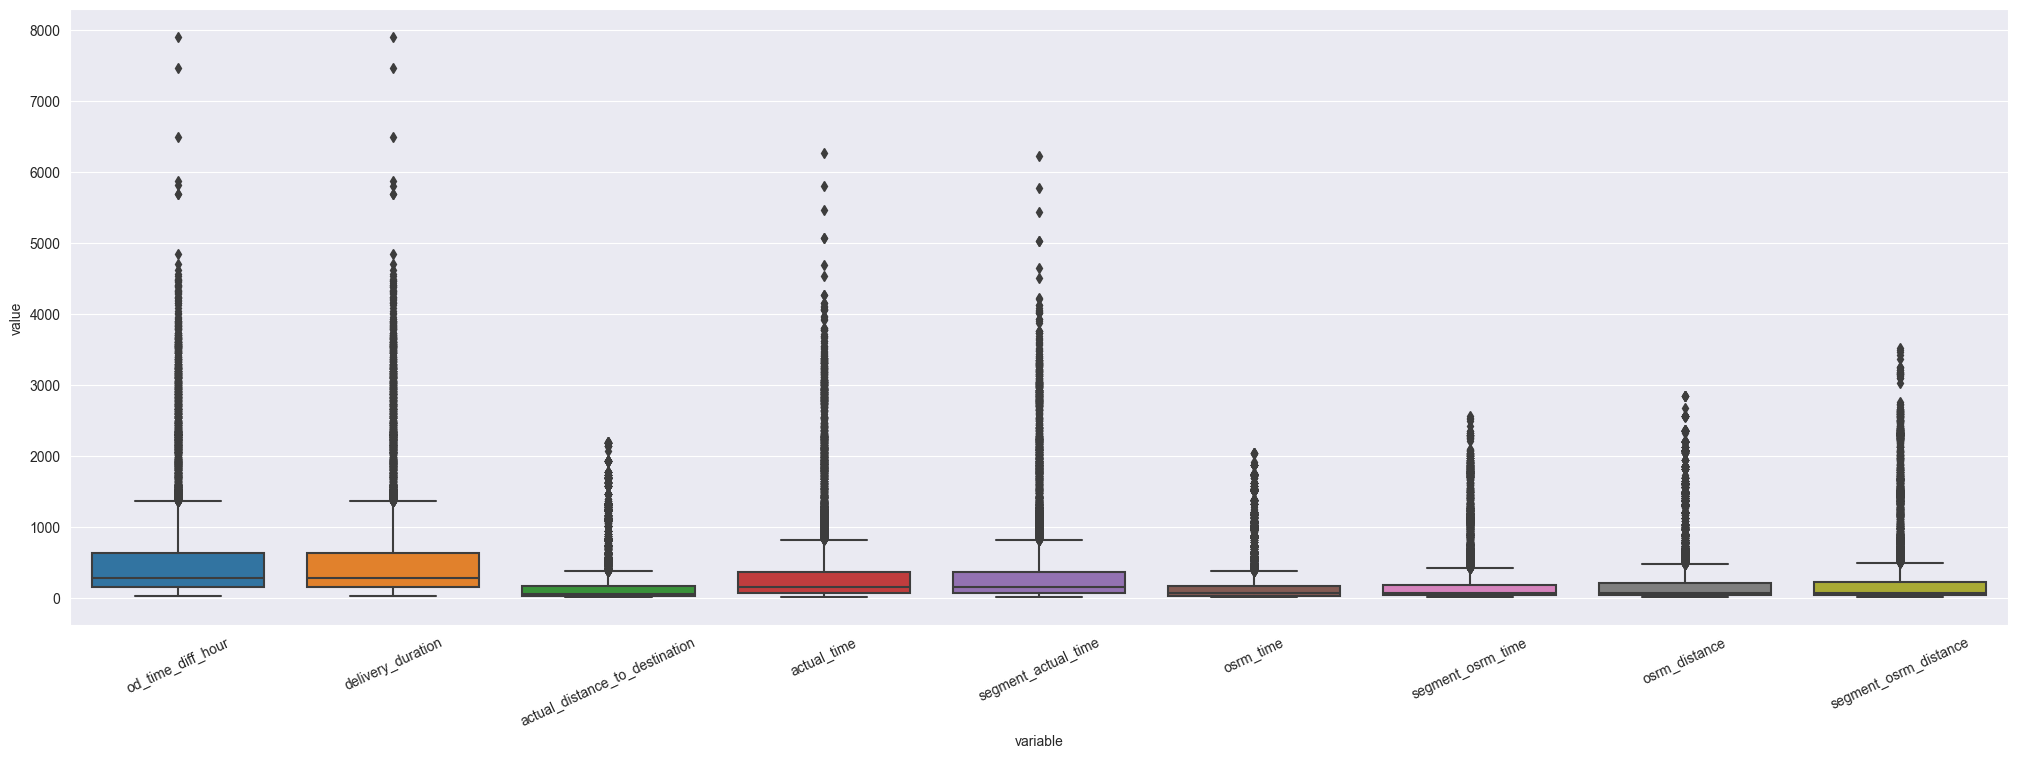

In [40]:
x = df.select_dtypes(exclude = ['object','datetime']).columns[:-6]

# Create a new dataframe with columns stacked vertically.
df_melt = df[x].melt()

# Customize the size of your plot
plt.figure(figsize=(25,8))

# Create boxplot
sns.boxplot(x='variable', y='value', data=df_melt)

# Rotate x-axis labels
plt.xticks(rotation=25)

plt.show()

#### Handling Outliers

In [41]:
p75 = df[x].quantile(0.75)
p25 = df[x].quantile(0.25)
iqr  = p75 - p25
hw= (p75 + (iqr*1.5))

In [42]:
print(f"Outliers Percent {len(df[(df[x] > hw).all(axis=1)]) / df.shape[0] * 100}")

Outliers Percent 6.877662811929397


In [43]:
df = df[~( (df[x] < (p25 - 1.5 * iqr) ) | (df[x] > (p75 + 1.5 * iqr) ) ).any(axis=1)].reset_index(drop = True)

In [44]:
df.shape

(12723, 30)

## Categorical Columns Overview
- From **Route_Type** we can see <inf>most</inf> of the transportation is done through **Carting**
    * FTL – Full Truck Load: FTL shipments get to the destination sooner
    * Carting: Handling system consisting of small vehicles
- We can see a High count of Transportation in the month of September ; Reason Likely because of Limitation of Data
- Interesting Insight was found out When Analyzed Hourly Overview 
    *  Quiet Hours:[8,14] we usually see low counts of transport taking place
    *  Transitional Hours: [15,20) we can see a transition from Quiet to Peak Hours
    *  Peak Hours: [20,0]  we can the highest count of transportation taking place 
- While observing Daily Trip overview, we can Expect 500+ transports
- On Wednesday we can expect the highest transportation Activity while Sunday it's Lowest
- We can see **Maharashtra, Karnataka and Haryana** being the places highest transportation Actitivy 

---
Converting to Categorical Columns

In [57]:
df[['data','route_type','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek','source_state','destination_state','source_city','destination_city','source_place','destination_place']] = df[['data','route_type','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek','source_state','destination_state','source_city','destination_city','source_place','destination_place']].astype('category')

In [64]:
df.select_dtypes( include =  ['category']).columns

Index(['data', 'route_type', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek', 'source_state', 'destination_state',
       'source_city', 'destination_city', 'source_place', 'destination_place'],
      dtype='object')

In [143]:
misc_cols = ['data','route_type']
trips_cols = ['trip_month', 'trip_hour', 'trip_day', 'trip_dayofweek']
state_cols = ['source_state', 'destination_state'] # Other state columns Visualization are better suited for Softwares like Power BI

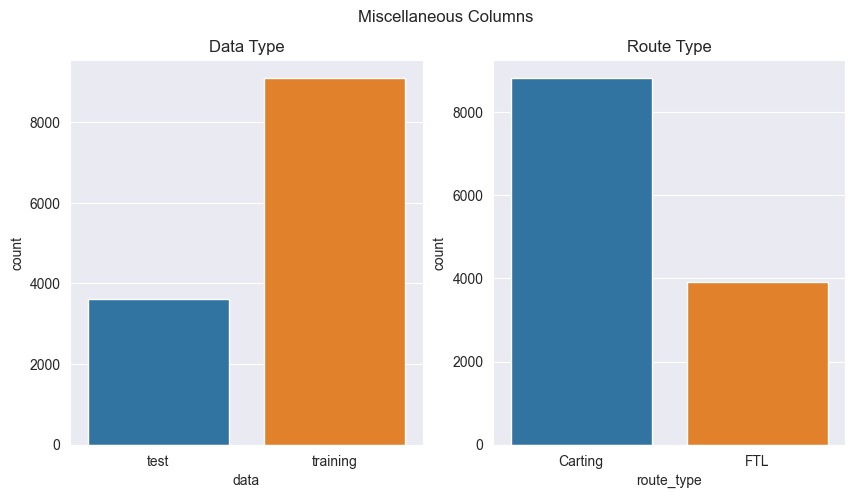

In [107]:
plt.figure(figsize=(10,5))
title = ['Data Type','Route Type']
subplots = [121,122]

for i in range(len(misc_cols)) :
    plt.subplot(subplots[i])
    plt.suptitle("Miscellaneous Columns")
    plt.title(title[i])
    sns.countplot(data = df , x =misc_cols[i])

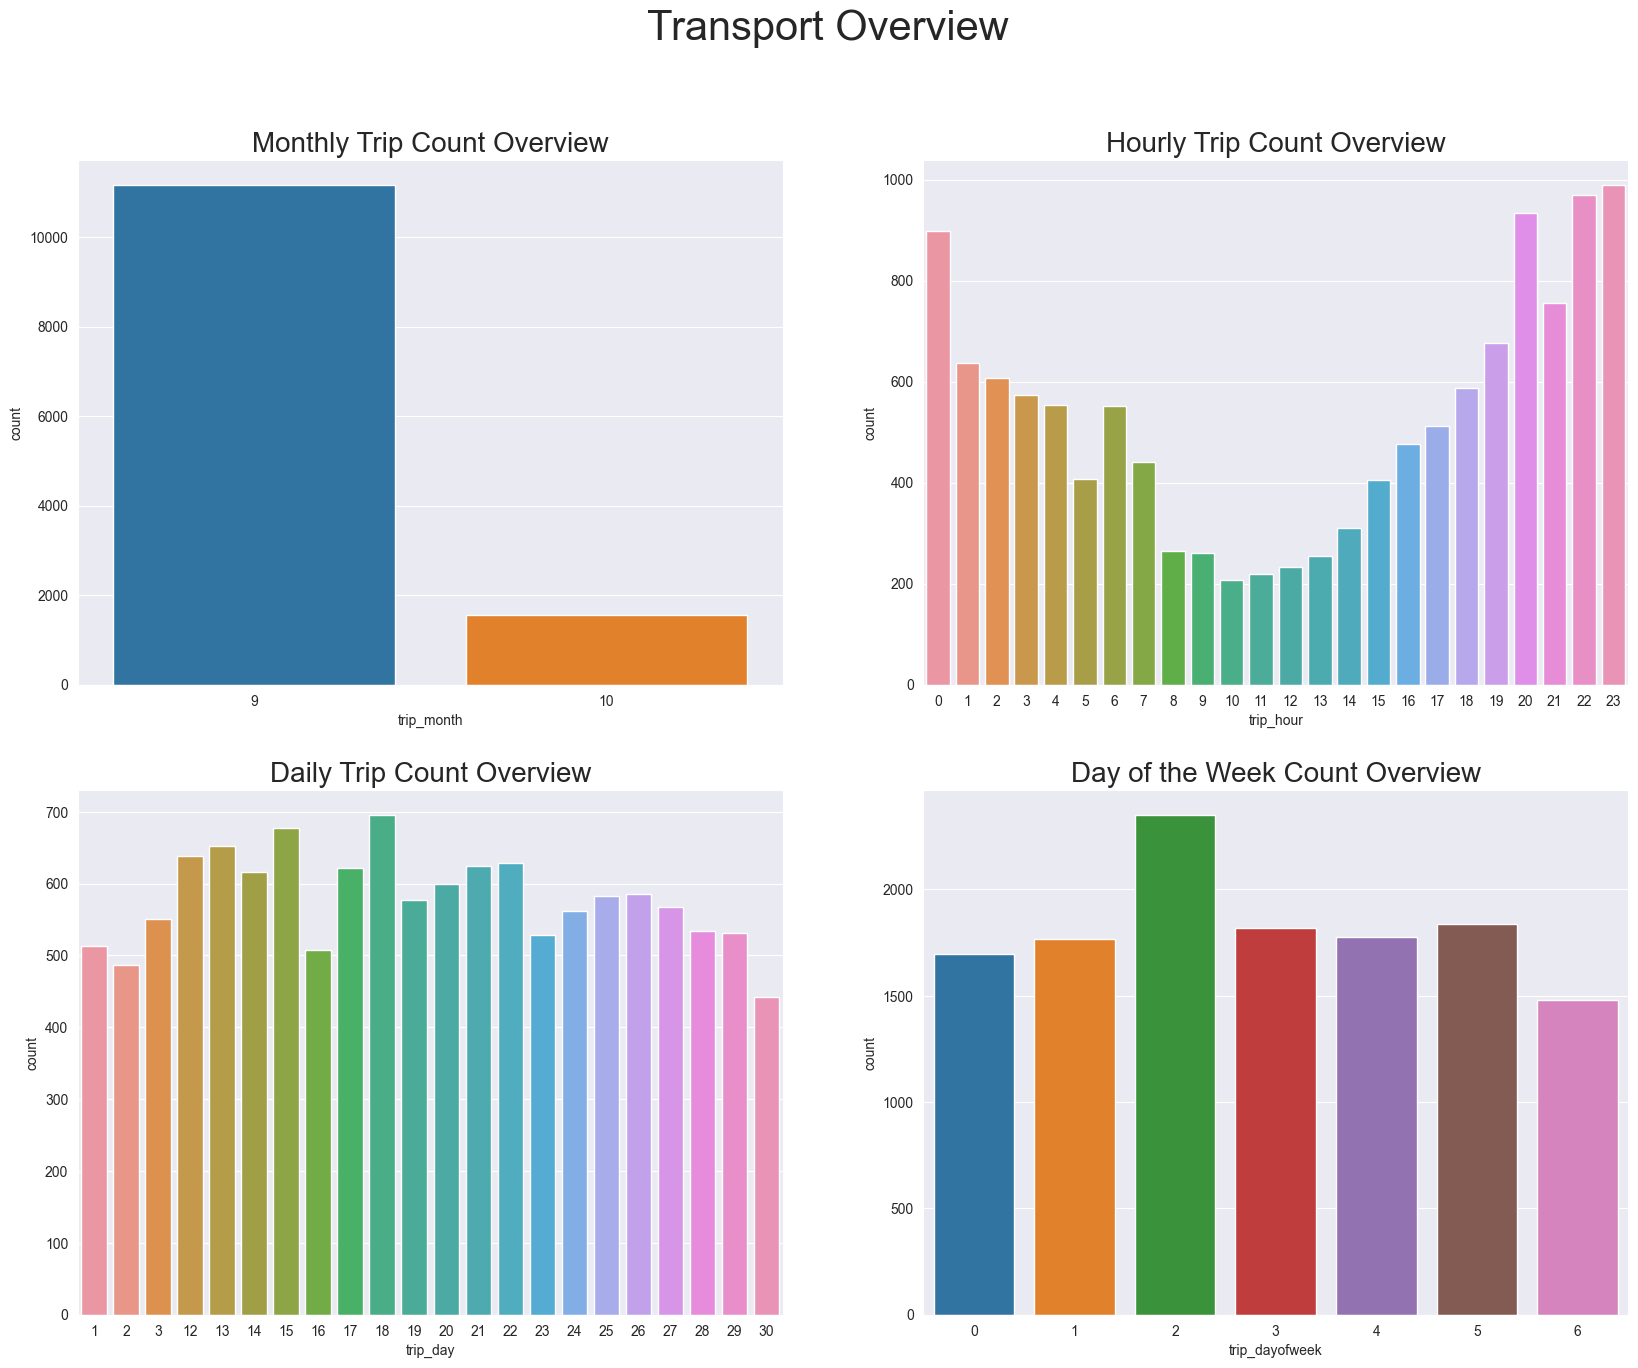

In [115]:
plt.figure(figsize=(20,15))
subplots = [221,222,223,224]
title = ['Monthly Trip Count Overview','Hourly Trip Count Overview','Daily Trip Count Overview', 'Day of the Week Count Overview']
for i in range(len(trips_cols)) :
    plt.subplot(subplots[i])
    plt.suptitle("Transport Overview",fontsize= 30)
    plt.title(title[i],fontsize = 20)
    sns.countplot(data = df , x =trips_cols[i])

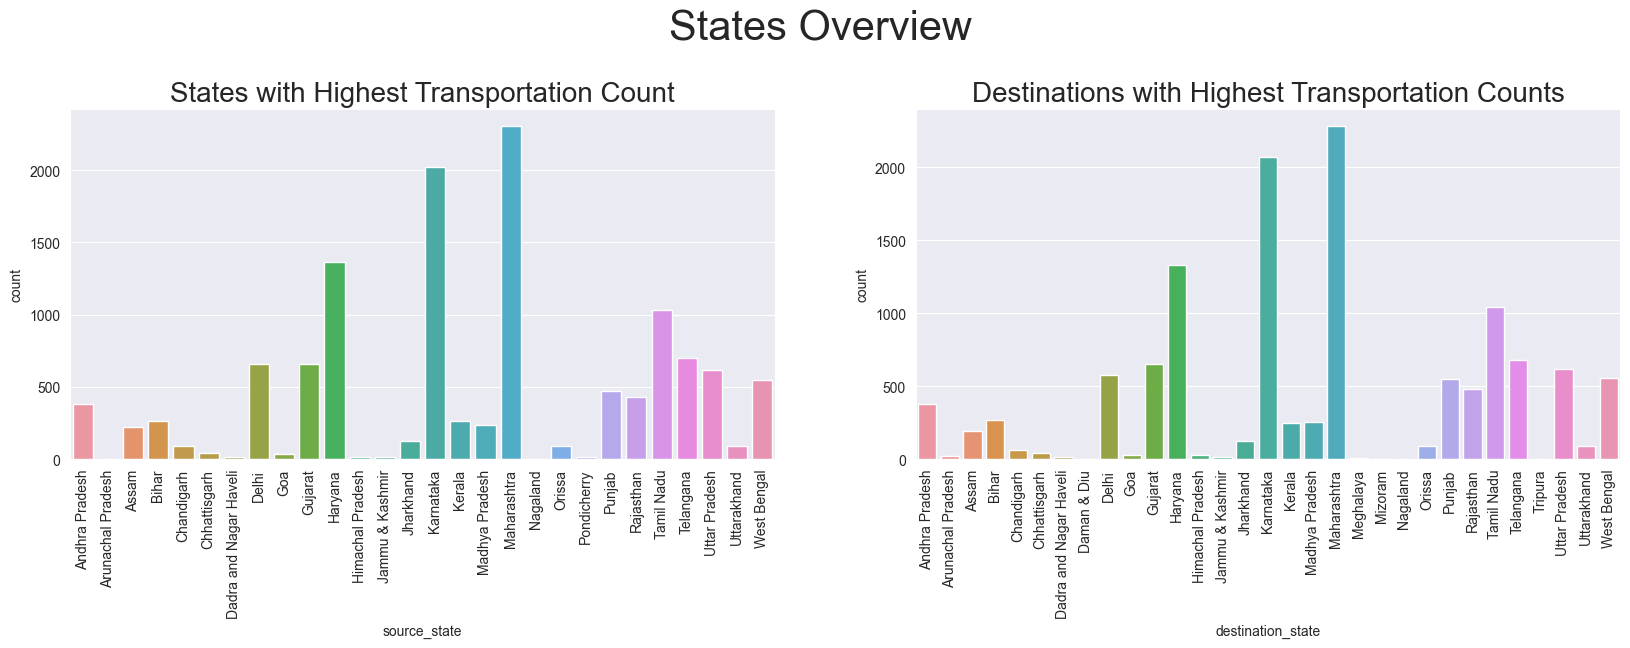

In [150]:
plt.figure(figsize=[20,10])
subplots = [221,222]
title = ['States with Highest Transportation Count','Destinations with Highest Transportation Counts']
for i in range(len(state_cols)) :
    plt.subplot(subplots[i])
    plt.suptitle("States Overview",fontsize= 30)
    plt.title(title[i],fontsize = 20)
    plt.xticks(rotation = 90)
    sns.countplot(data = df , x =state_cols[i])

Since The other remaining columns related state are Difficult to plot as they have more than 700 unique values, we can still get overview of them

In [140]:
state_dff_cols = ['source_city', 'destination_city', 'source_place', 'destination_place']

In [153]:
df[state_dff_cols].describe()

,source_city,destination_city,source_place,destination_place
count,12723,12723,12723,12723
unique,707,827,748,847
top,Bengaluru,Bengaluru,Central,Central
freq,1034,1073,728,673
